In [69]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [70]:
df =pd.read_csv("../../../data/kc_house_data.csv")

In [71]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [72]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [73]:
df["waterfront"].fillna("0", inplace = True)

In [74]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [75]:
df.drop("yr_renovated", axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0.0,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0.0,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0.0,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0.0,3,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [76]:
df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.249727,-0.146896,1.000000,0.756073,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981


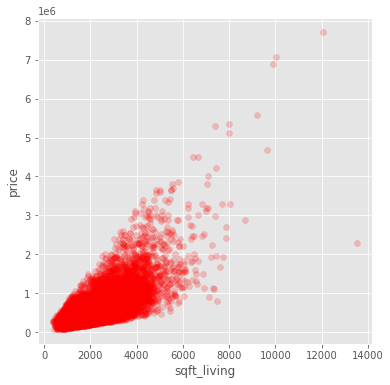

In [77]:
plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.scatter(df["sqft_living"], df["price"], color='r', alpha=0.20)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
plt.show();

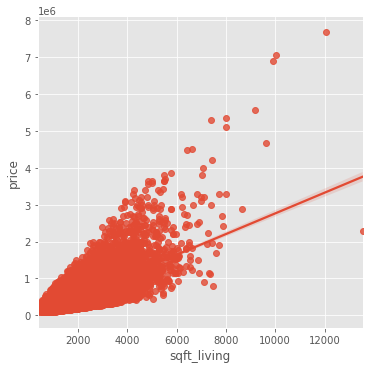

In [78]:
sns.lmplot(x='sqft_living', y='price', data=df)
plt.show()

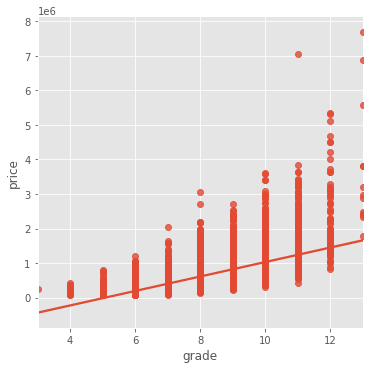

In [79]:
sns.lmplot(x='grade', y='price', data=df)
plt.show()

In [80]:
model = sm.OLS(df['sqft_living'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            sqft_living   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.124e+05
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:14:03   Log-Likelihood:                     -1.7786e+05
No. Observations:               21597   AIC:                                  3.557e+05
Df Residuals:                   21596   BIC:                                  3.557e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [81]:
model = sm.OLS(df['grade'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  grade   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                          7.006e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:14:03   Log-Likelihood:                         -59251.
No. Observations:               21597   AIC:                                  1.185e+05
Df Residuals:                   21596   BIC:                                  1.185e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [82]:
model = sm.OLS(df['sqft_above'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             sqft_above   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          8.544e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:14:03   Log-Likelihood:                     -1.7720e+05
No. Observations:               21597   AIC:                                  3.544e+05
Df Residuals:                   21596   BIC:                                  3.544e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [83]:
model = sm.OLS(df['bathrooms'], df['price'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              bathrooms   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                          7.282e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        10:14:04   Log-Likelihood:                         -32240.
No. Observations:               21597   AIC:                                  6.448e+04
Df Residuals:                   21596   BIC:                                  6.449e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [84]:
model2 = sm.OLS(df["price"], sm.add_constant(df["sqft_living"])).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:14:04   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

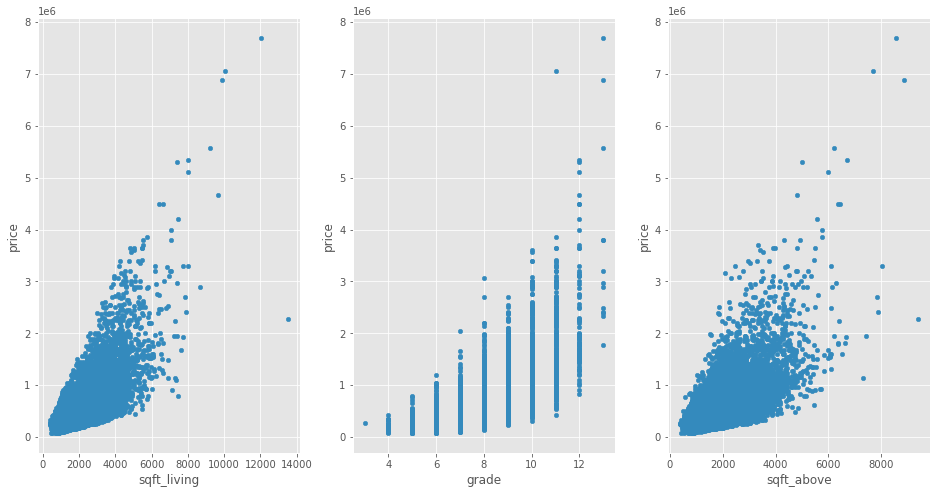

In [85]:
fig, axs = plt.subplots(1, 3,)
df.plot(kind='scatter', x='sqft_living', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='grade', y='price', ax=axs[1])
df.plot(kind='scatter', x='sqft_above', y='price', ax=axs[2])

In [86]:
f = 'price ~ sqft_living + grade + sqft_above'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8494.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:14:04   Log-Likelihood:            -2.9897e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21593   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.564e+05   1.36e+04    -48.298      0.000   -6.83e+05    -6.3e+05
sqft_living   234.5900      4.039     58.075      0.000     226.672     242.508
grade        1.108e+05   2325.608     47.637      0.000    1.06e+05    1.15e+05
sqft_above    -78.0959      4.427    -17.642      0.000     -86.773     -69.419
==============================================================================
Omnibus:                    17102.886   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1062513.676
Skew:                           3.332   Prob(JB):                         0.00
Kurtosis:                      36.709   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
f = 'price ~ sqft_living + grade + bathrooms'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:14:04   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.024e+05   1.33e+04    -45.279      0.000   -6.28e+05   -5.76e+05
sqft_living   203.1650      3.339     60.855      0.000     196.621     209.709
grade        1.046e+05   2293.086     45.626      0.000       1e+05    1.09e+05
bathrooms   -3.836e+04   3454.677    -11.103      0.000   -4.51e+04   -3.16e+04
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
features = ['grade', 'sqft_living', 'bathrooms']
X = df[features]
y = df.price

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)
print(mlr.score(X,y))
# adjusted R-squared
print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

[104623.84505781    203.16503658 -38357.50160684]
0.5373402425376977
0.5372759634068504


In [91]:
X= df[["sqft_living", "grade", "bathrooms"]]
y= df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


Training Root Mean Squared Error: 248927.43049665034
Test Root Mean Squared Error: 252774.4708527341


In [93]:
X= df[["sqft_living", "grade", "bathrooms"]]
y= df[["price"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   grade        21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


In [94]:
new_model = LinearRegression()
new_model.fit(X_train2, y_train2)
final_predict_train = new_model.predict(X_train2)
final_predict_test = new_model.predict(X_test2)
print('Training Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train2, final_predict_train)))
print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, final_predict_test)))

Training Root Mean Squared Error: 252243.3456376041
Test Root Mean Squared Error: 239004.36226040026


In [96]:
from scipy import stats
df = df[(np.abs(stats.zscore(df["price"])) < 3)]

In [97]:
X= df[["sqft_living", "grade", "bathrooms"]]
y= df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21191 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21191 non-null  int64  
 1   grade        21191 non-null  int64  
 2   bathrooms    21191 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 662.2 KB
